##Objective
Our objective is to build a machine learning model to predict whether the customer will churn or not in the next six months.

In [ ]:
import pandas as pd                                                       # Pandas package for reading csv files
import numpy as np                                                        # Numpy package for computing
import matplotlib.pyplot as plt                                           # Visualization package

%matplotlib inline
import seaborn as sns 

# display warnings only the first time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the train and test data files
train= pd.read_csv('train_data.csv')

In [ ]:
print(train.shape)

(6650, 11)


In [ ]:
test= pd.read_csv('test_data.csv')

In [ ]:
print(test.shape)

(2851, 10)


In [ ]:
test.drop(['ID'], axis='columns', inplace=True)

In [ ]:
test.head(2)

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,36,Male,5L - 10L,341460.72,2,0,2,1,Average


In [ ]:
Submission_sample= pd.read_csv('Submission_sample.csv')

1. Exploratory Data Analysis

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [ ]:
train.head(2)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0


In [ ]:
train.drop(['ID'], axis='columns', inplace=True)

In [ ]:
train.describe().T
#test.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,6650.0,41.130226,9.685747,21.0,34.0000,40.000,47.00,72.00
Balance,6650.0,804595.354985,515754.867315,63.0,392264.2125,764938.575,1147123.71,2436615.81
Vintage,6650.0,2.250226,1.458795,0.0,1.0000,2.000,3.00,5.00
Transaction_Status,6650.0,0.515789,0.499788,0.0,0.0000,1.000,1.00,1.00
Credit_Card,6650.0,0.664361,0.472249,0.0,0.0000,1.000,1.00,1.00
Is_Churn,6650.0,0.231128,0.421586,0.0,0.0000,0.000,0.00,1.00


In [ ]:
train.Is_Churn.value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

##Imbalanced data set. 
Target variable has imbalanced class distribution. Positive class (Churn=Yes=1) is much less than negative class (churn=No=0). Imbalanced class distributions influence the performance of a machine learning model negatively. I will use upsampling or downsampling to overcome this issue.

In [ ]:
#to check churn rate for males and females:
train[['Gender','Is_Churn']].groupby(['Gender']).mean()

,Is_Churn
Gender,
Female,0.25576
Male,0.21041


Female customers are more likely to churn than male customers.

In [ ]:
#Let’s see if churn rate for vintage (no.of years associated with bank):
train[['Vintage','Is_Churn']].groupby(['Vintage']).mean()

,Is_Churn
Vintage,
0,0.210251
1,0.242245
2,0.207831
3,0.241281
4,0.247685
5,0.231511


###Customers having more vintage are more likely to churn. 
Bank should take care of the customers who continued their service till 1 year and 3 to 4 years as they can be retained if they are going to churn.
Continuous feedback from customers is a better way to decrease the churn rate.

In [ ]:
train[['Income','Is_Churn']].groupby(['Income']).mean()

,Is_Churn
Income,
10L - 15L,0.235544
5L - 10L,0.223064
Less than 5L,0.225048
More than 15L,0.243123


It seems customers having income 10L and more is more likely to churn.

In [ ]:
train[['Transaction_Status','Is_Churn']].groupby(['Transaction_Status']).mean()

,Is_Churn
Transaction_Status,
0,0.268944
1,0.195627


###The customers who have not done any transaction in the past 3 months are more likely to churn. 
Bank must reach out to the customers to know the reason. Feedbeck from customers always helps them to understand and improvements in the services. 

In [ ]:
train[['Credit_Card','Is_Churn']].groupby(['Credit_Card']).mean()

,Is_Churn
Credit_Card,
0,0.231631
1,0.230874


Credit card doesn't make any impact for the churn rate so it can be dropped.

In [ ]:
train[['Credit_Category','Is_Churn']].groupby(['Credit_Category']).mean()

,Is_Churn
Credit_Category,
Average,0.230543
Good,0.203135
Poor,0.245449


Customers who are having poor credit score are more likely to churn

In [ ]:
train[['Product_Holdings','Is_Churn']].groupby(['Product_Holdings']).mean()

,Is_Churn
Product_Holdings,
1,0.245625
2,0.217473
3+,0.220149


Customers who are holding only 1 product are more likely to churn

In [ ]:
#converting Vintage feature from years to months
train['Vintage']= 12* train['Vintage']

In [ ]:
test['Vintage']= 12* test['Vintage']

In [ ]:
train.head(3)

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,48,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,24,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,24,1,2,0,Poor,0


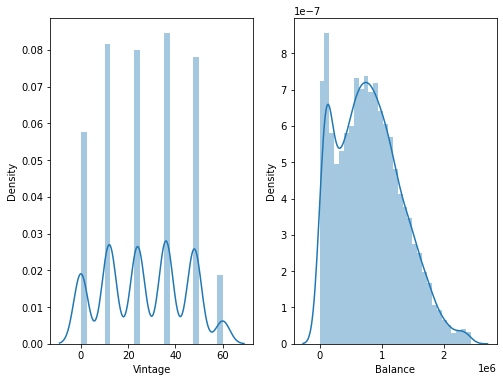

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8, 6))
sns.distplot(train["Vintage"], ax=axes[0])
sns.distplot(train["Balance"], ax=axes[1])

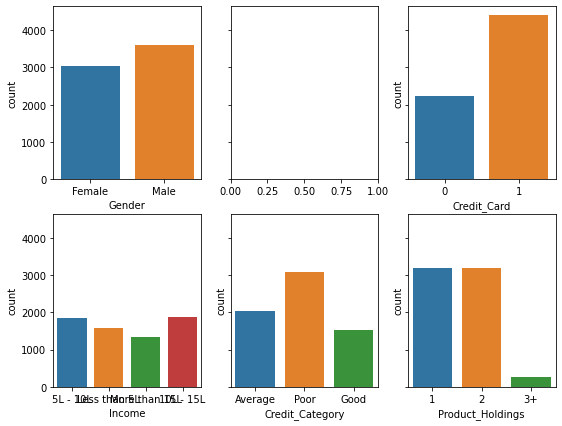

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(9, 7), sharey=True)
sns.countplot("Gender", data=train, ax=axes[0,0])
sns.countplot("Credit_Card", data=train, ax=axes[0,2])
sns.countplot("Income", data=train, ax=axes[1,0])
sns.countplot("Credit_Category", data=train, ax=axes[1,1])
sns.countplot("Product_Holdings", data=train, ax=axes[1,2])

In [ ]:
# Lets plot the correlation matrix 

corr_matrix = train.corr()
corr_matrix

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
Age,1.000000,0.002154,0.017353,0.032166,0.012089,0.204301
Balance,0.002154,1.000000,-0.019385,-0.005088,-0.025259,0.056380
Vintage,0.017353,-0.019385,1.000000,-0.027286,0.001856,0.020152
Transaction_Status,0.032166,-0.005088,-0.027286,1.000000,0.006526,-0.086917
Credit_Card,0.012089,-0.025259,0.001856,0.006526,1.000000,-0.000848
Is_Churn,0.204301,0.056380,0.020152,-0.086917,-0.000848,1.000000


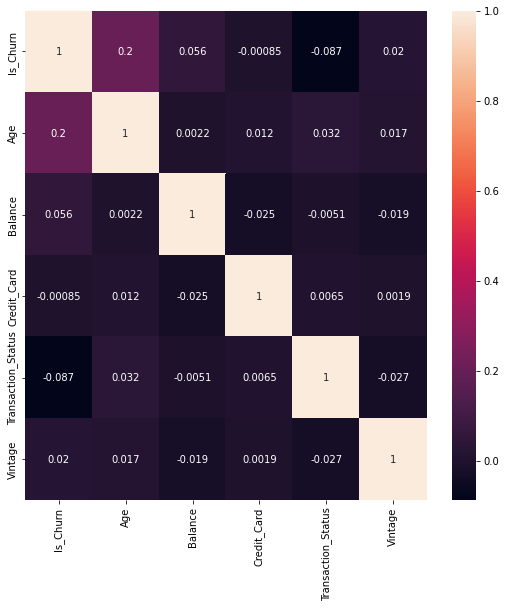

In [ ]:
small_df = train.sample(10, axis=1)
small_corr_matrix = small_df.corr()

plt.figure(figsize=(9,9))
sns.heatmap(small_corr_matrix, annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Encoding categorical variables:
cat_features = ['Gender', 'Income', 'Credit_Category' ]
X_df = pd.get_dummies(train, columns=cat_features, drop_first=True)

In [ ]:
cat_features_test = ['Gender', 'Income', 'Credit_Category' ]
X_df_test = pd.get_dummies(test, columns=cat_features, drop_first=True)

In [ ]:
X_df_test.head(2)

,Age,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Category_Good,Credit_Category_Poor
0,50,1008636.39,24,1,2,1,0,0,0,1,0,0
1,36,341460.72,24,0,2,1,1,1,0,0,0,0


In [ ]:
X_df.head(2)

,Age,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Is_Churn,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Category_Good,Credit_Category_Poor
0,36,563266.44,48,0,1,0,1,0,1,0,0,0,0
1,53,875572.11,24,1,1,1,0,0,0,1,0,0,1


In [ ]:
print(X_df_test.shape)
print(X_df.shape)

(2851, 12)
(6650, 13)


In [ ]:
#as 3+ value is not accountable integer so I will replace it by 3
train['Product_Holdings'].replace({"3+": 3}, inplace=True)
test['Product_Holdings'].replace({"3+": 3}, inplace=True)

In [ ]:
#Scaling the features Balance and Vintage and Age
sc = MinMaxScaler()
a = sc.fit_transform(train[['Vintage']])
b = sc.fit_transform(train[['Balance']])
c = sc.fit_transform(train[['Age']])
d = sc.fit_transform(train[['Product_Holdings']])
X_df['Vintage'] = a
X_df['Balance'] = b
X_df['Age'] = c
X_df['Product_Holdings'] = d

In [ ]:
X_df.head(2)

,Age,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Is_Churn,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Category_Good,Credit_Category_Poor
0,0.294118,0.231148,0.8,0,0.0,0,1,0,1,0,0,0,0
1,0.627451,0.359323,0.4,1,0.0,1,0,0,0,1,0,0,1


In [ ]:
X_df.shape   # dataset shape now

(6650, 13)

In [ ]:
sc = MinMaxScaler()
at = sc.fit_transform(test[['Vintage']])
bt = sc.fit_transform(test[['Balance']])
ct = sc.fit_transform(test[['Age']])
dt = sc.fit_transform(test[['Product_Holdings']])
X_df_test['Vintage'] = at
X_df_test['Balance'] = bt
X_df_test['Age'] = ct
X_df_test['Product_Holdings'] = dt

In [ ]:
X_df_test.head(2)

,Age,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Category_Good,Credit_Category_Poor
0,0.568627,0.413891,0.4,1,0.5,1,0,0,0,1,0,0
1,0.294118,0.139709,0.4,0,0.5,1,1,1,0,0,0,0


In [ ]:
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6650.0,0.394710,0.189917,0.0,0.254902,0.372549,0.509804,1.0
Balance,6650.0,0.330193,0.211674,0.0,0.160966,0.313917,0.470772,1.0
Vintage,6650.0,0.450045,0.291759,0.0,0.200000,0.400000,0.600000,1.0
Transaction_Status,6650.0,0.515789,0.499788,0.0,0.000000,1.000000,1.000000,1.0
Product_Holdings,6650.0,0.279549,0.285989,0.0,0.000000,0.500000,0.500000,1.0
Credit_Card,6650.0,0.664361,0.472249,0.0,0.000000,1.000000,1.000000,1.0
Is_Churn,6650.0,0.231128,0.421586,0.0,0.000000,0.000000,0.000000,1.0
Gender_Male,6650.0,0.543158,0.498171,0.0,0.000000,1.000000,1.000000,1.0
Income_5L - 10L,6650.0,0.277744,0.447920,0.0,0.000000,0.000000,1.000000,1.0
Income_Less than 5L,6650.0,0.236541,0.424990,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
X_df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2851.0,0.397102,0.188564,0.0,0.254902,0.372549,0.509804,1.0
Balance,2851.0,0.332218,0.215836,0.0,0.164164,0.314141,0.473727,1.0
Vintage,2851.0,0.444195,0.297988,0.0,0.200000,0.400000,0.600000,1.0
Transaction_Status,2851.0,0.506840,0.500041,0.0,0.000000,1.000000,1.000000,1.0
Product_Holdings,2851.0,0.290951,0.295229,0.0,0.000000,0.500000,0.500000,1.0
Credit_Card,2851.0,0.668888,0.470696,0.0,0.000000,1.000000,1.000000,1.0
Gender_Male,2851.0,0.541915,0.498327,0.0,0.000000,1.000000,1.000000,1.0
Income_5L - 10L,2851.0,0.278499,0.448339,0.0,0.000000,0.000000,1.000000,1.0
Income_Less than 5L,2851.0,0.227289,0.419154,0.0,0.000000,0.000000,0.000000,1.0
Income_More than 15L,2851.0,0.198176,0.398695,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
print(X_df_test.shape)

(2851, 12)


Text(0.5, 1.0, 'Class Distribution Before Resampling')

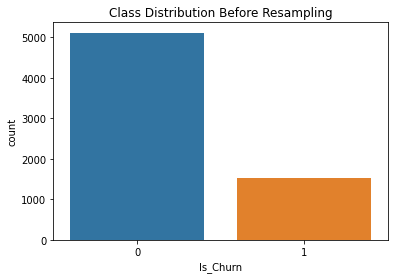

In [ ]:
sns.countplot('Is_Churn', data=X_df).set_title('Class Distribution Before Resampling')

##Upsampling the positive class:

In [ ]:
#Separating positive class (churn=yes) and negative class (churn=no):
X_no = X_df[X_df.Is_Churn == 0]
X_yes = X_df[X_df.Is_Churn == 1]

In [ ]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))


5113


Text(0.5, 1.0, 'Class Distribution After Resampling')

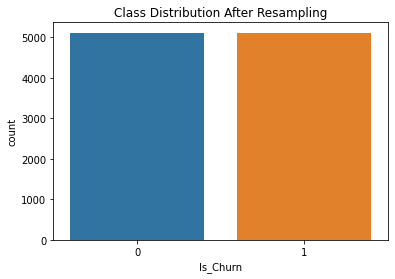

In [ ]:
#Combining positive and negative class 
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Is_Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

#Model building 

In [ ]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Is_Churn'], axis=1) #features (independent variables)
y = X_upsampled['Is_Churn'] #target (dependent variable)

In [ ]:
# split the train data into train and test to check the acuuracy of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

##Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
clf_ridge = RidgeClassifier(alpha=1.0) #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier()

In [ ]:
pred = clf_ridge.predict(X_train)    #on train dataset
accuracy_score(y_train, pred)

0.6205378973105135

In [ ]:
  pred_t = clf_ridge.predict(X_test)                                              #on train dataset

0.5962854349951124
************
Confusion matrix


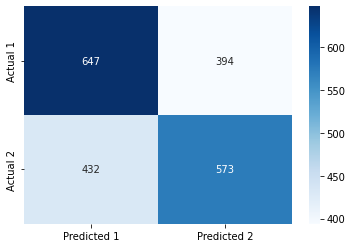

************
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1041
           1       0.59      0.57      0.58      1005

    accuracy                           0.60      2046
   macro avg       0.60      0.60      0.60      2046
weighted avg       0.60      0.60      0.60      2046



In [ ]:
print(accuracy_score(y_test,pred_t))
print('************')
print('Confusion matrix')
clf_ridge_cfm=confusion_matrix(y_test, pred_t)

lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]
sns.heatmap(clf_ridge_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('************')
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_t))

##Ridge model
The model achieved 62% accuracy on training set and 59.6% accuracy on test set.

In [ ]:
pred_df_test = clf_ridge.predict(X_df_test)

In [ ]:
pred_df_test.shape

(2851,)

In [ ]:
output = pd.DataFrame({'ID': Submission_sample.ID,
'Is_Churn':pred_df_test})
output.to_csv('submission_1.csv', index=False)

#set(Submission_sample['ID']) - set(output['ID'])

###Improving Ridge Classifier 

In [ ]:
# define model
from sklearn.linear_model import RidgeClassifierCV
clf_ridge = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])

clf_ridge.fit(X_train, y_train) #train the model
clf_ridge.score(X_train, y_train)

0.6205378973105135

In [ ]:
  pred_t = clf_ridge.predict(X_test)

0.5962854349951124
************
Confusion matrix


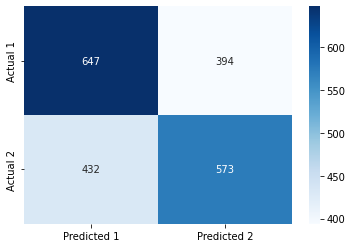

************
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1041
           1       0.59      0.57      0.58      1005

    accuracy                           0.60      2046
   macro avg       0.60      0.60      0.60      2046
weighted avg       0.60      0.60      0.60      2046



In [ ]:
print(accuracy_score(y_test,pred_t))
print('************')
print('Confusion matrix')
clf_ridge_cfm=confusion_matrix(y_test, pred_t)

lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]
sns.heatmap(clf_ridge_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('************')
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_t))

In [ ]:
pred_df_test = clf_ridge.predict(X_df_test)

In [ ]:
output = pd.DataFrame({'ID': Submission_sample.ID,
'Is_Churn':pred_df_test})
output.to_csv('submission_1.1.csv', index=False)

##Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(random_state=101,C=100)

lr = LogisticRegression(random_state=42,C=100)

In [102]:
lr_model=lr.fit(X_train,y_train)

In [103]:
lr_pred_t = lr_model.predict(X_train)  #on training data set
print(accuracy_score(y_train,lr_pred_t))

0.6206601466992665


0.5953079178885631
************
Confusion matrix


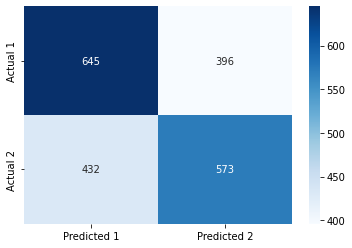

************
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1041
           1       0.59      0.57      0.58      1005

    accuracy                           0.60      2046
   macro avg       0.60      0.59      0.59      2046
weighted avg       0.60      0.60      0.60      2046



In [104]:
lr_pred = lr_model.predict(X_test)

print(accuracy_score(y_test,lr_pred))
print('************')
print('Confusion matrix')
lr_cfm=confusion_matrix(y_test, lr_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(lr_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('************')
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

In [105]:
#on actual test data
lr_pred2 = lr_model.predict(X_df_test)

####Logistic Regression gives me the best f1 score on public board out of all models I have tried. so this is my final model.

In [ ]:
output = pd.DataFrame({'ID': Submission_sample.ID,
'Is_Churn':lr_pred2})
output.to_csv('submission_2.csv', index=False)

##Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 10, min_samples_leaf =3, random_state=42)

In [97]:
dt_model=dt.fit(X_train,y_train)
dt_pred_t=dt_model.predict(X_train)   # on train data

print(accuracy_score(y_train,dt_pred_t))

0.7613691931540343


0.6847507331378299
************
Confusion matrix


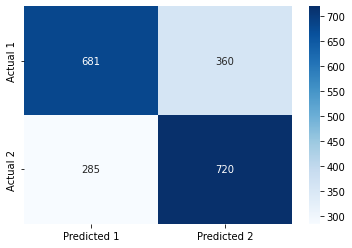

classification report
              precision    recall  f1-score   support

           0       0.70      0.65      0.68      1041
           1       0.67      0.72      0.69      1005

    accuracy                           0.68      2046
   macro avg       0.69      0.69      0.68      2046
weighted avg       0.69      0.68      0.68      2046



In [98]:
dt_pred=dt_model.predict(X_test)    # on test dataset

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(accuracy_score(y_test,dt_pred))
print('************')
print('Confusion matrix')
dt_cfm=confusion_matrix(y_test, dt_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(dt_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('classification report')
print(classification_report(y_test,dt_pred))

##DesisionTree model
The DT model improved accuracy and achieved 76% accuracy on training set and 68.5% accuracy on test set. It seems the model is overfitted because accuracies on training and test sets are not close. 
Lets try random forest

In [99]:
dt_pred3 = dt_model.predict(X_df_test)

In [100]:
output = pd.DataFrame({'ID': Submission_sample.ID,
'Is_Churn':dt_pred3})
output.to_csv('submission_3.csv', index=False)

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=101)

In [ ]:
rf_model=rf.fit(X_train,y_train)
rf_pred_t=rf_model.predict(X_train)
print(accuracy_score(y_train,rf_pred_t))


0.8548899755501222


0.7463343108504399
************
Confusion matrix


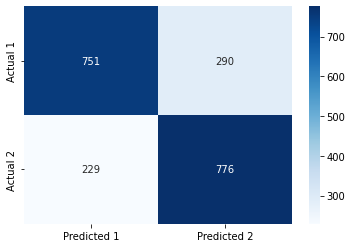

classification report
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1041
           1       0.73      0.77      0.75      1005

    accuracy                           0.75      2046
   macro avg       0.75      0.75      0.75      2046
weighted avg       0.75      0.75      0.75      2046



In [ ]:
rf_pred=rf_model.predict(X_test)

print(accuracy_score(y_test,rf_pred))
print('************')
print('Confusion matrix')
rf_cfm=confusion_matrix(y_test, rf_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(rf_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('classification report')
print(classification_report(y_test,rf_pred))

The RF model improved accuracy a lot and achieved 88% accuracy on training set and 77% accuracy on test set. 
Let's try xgboost to improve the model accuary again.

In [ ]:
rf_pred4 = dt_model.predict(X_df_test)

In [ ]:
output = pd.DataFrame({'ID': Submission_sample.ID,
'Is_Churn':rf_pred4})
output.to_csv('submission_4.csv', index=False)

###XGBoost Model

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xgb_model=xgb_clf.fit(X_train,y_train)


In [ ]:
xgb_pred_t=xgb_model.predict(X_train)
print(accuracy_score(y_train,xgb_pred_t))

0.6479217603911981


0.6143695014662757
************
Confusion matrix


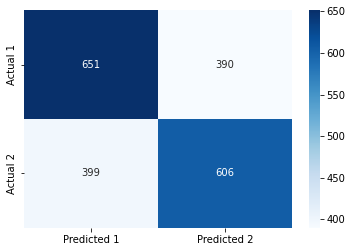

classification report
              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1041
           1       0.61      0.60      0.61      1005

    accuracy                           0.61      2046
   macro avg       0.61      0.61      0.61      2046
weighted avg       0.61      0.61      0.61      2046



In [ ]:
xgb_pred=xgb_model.predict(X_test)

print(accuracy_score(y_test,xgb_pred))
print('************')
print('Confusion matrix')
xgb_cfm=confusion_matrix(y_test, xgb_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(xgb_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('classification report')
print(classification_report(y_test,xgb_pred))

In [ ]:
xgb_pred5 = dt_model.predict(X_df_test)

In [ ]:
output = pd.DataFrame({'ID': Submission_sample.ID,
'Is_Churn':xgb_pred5})
output.to_csv('submission_5.csv', index=False)